# 位相差型エンコーダの角度検出

[Study of a system for the absolute position measurement](https://tesi.supsi.ch/2534/1/RelazioneMencarelli.pdf)

2つの周期が異なる正弦波から絶対角度を算出する

In [77]:
from control.matlab import *
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [82]:
t = np.arange(0, 2*np.pi, 0.01)

Amp = 1.0

Omega = 1.0

master_sin = Amp * np.sin(16 * Omega * t )
nonius_sin = Amp * np.sin(15 * Omega * t )
master_cos = Amp * np.cos(16 * Omega * t )
nonius_cos = Amp * np.cos(15 * Omega * t )

master = np.array([master_sin, master_cos])
nonius = np.array([nonius_sin, nonius_cos])

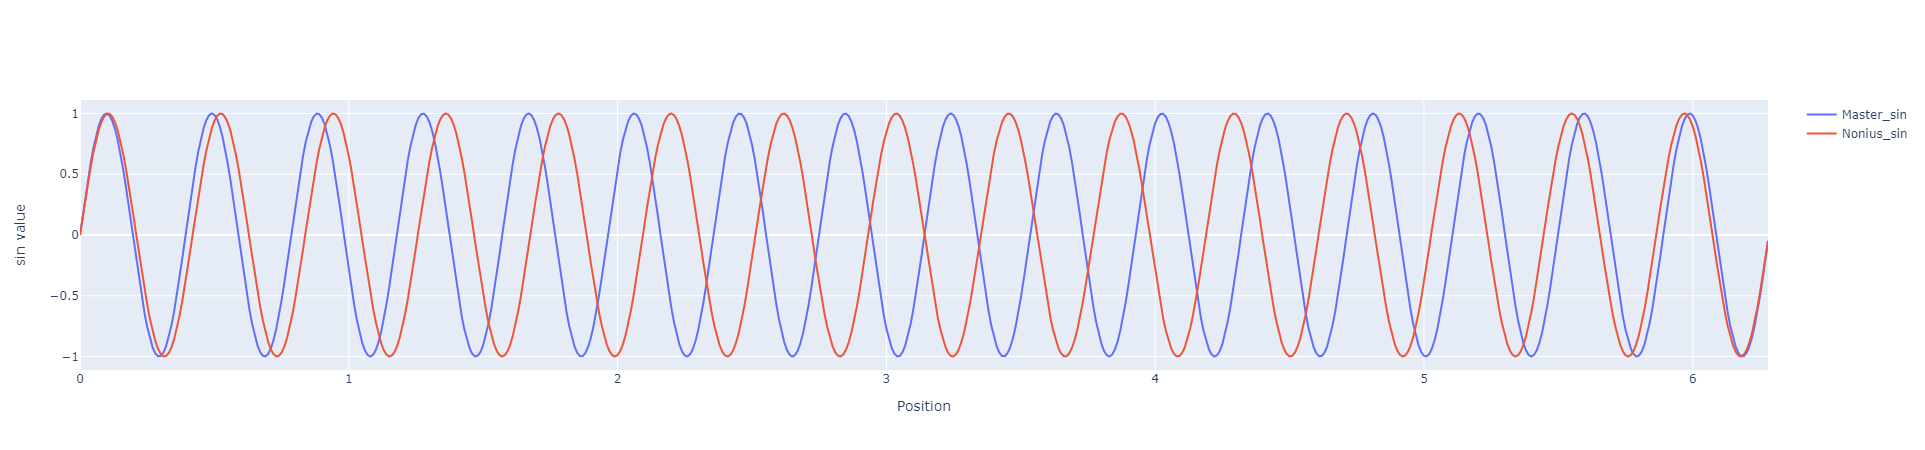

In [83]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=t,
    y=master[0],
    name="Master_sin",
))

fig.add_trace(go.Scatter(
    x=t,
       y=nonius[0],
    name="Nonius_sin",
))

fig.update_layout(
    xaxis={"title":"Position"},
    yaxis={"title":"sin value"},
)

fig.show()

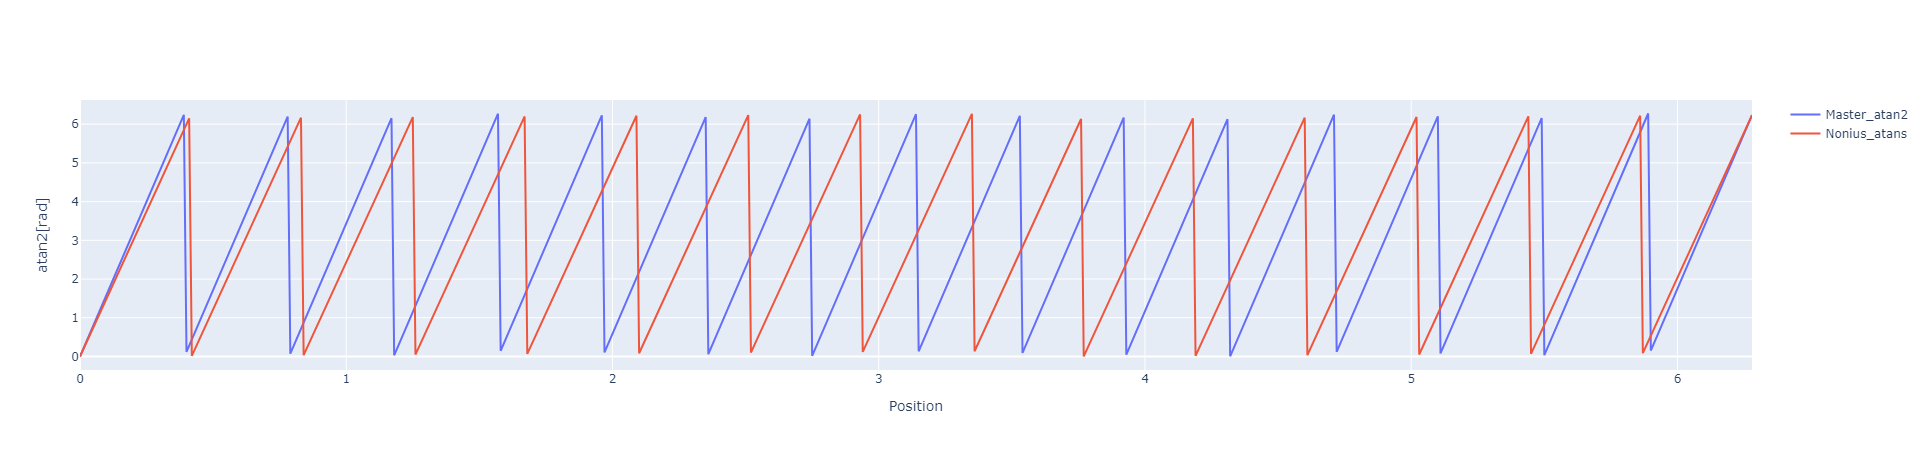

In [84]:
master_atan2 = np.array([2*np.pi + i if i < 0 else i for i in np.arctan2(master[0],master[1])])
nonius_atan2 = np.array([2*np.pi + i if i < 0 else i for i in np.arctan2(nonius[0],nonius[1])])

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=t,
    y=master_atan2,
    name="Master_atan2",
))

fig.add_trace(go.Scatter(
    x=t,
    y=nonius_atan2,
    name="Nonius_atans",
))

fig.update_layout(
    xaxis={"title":"Position"},
    yaxis={"title":"atan2[rad]"},
)

fig.show()

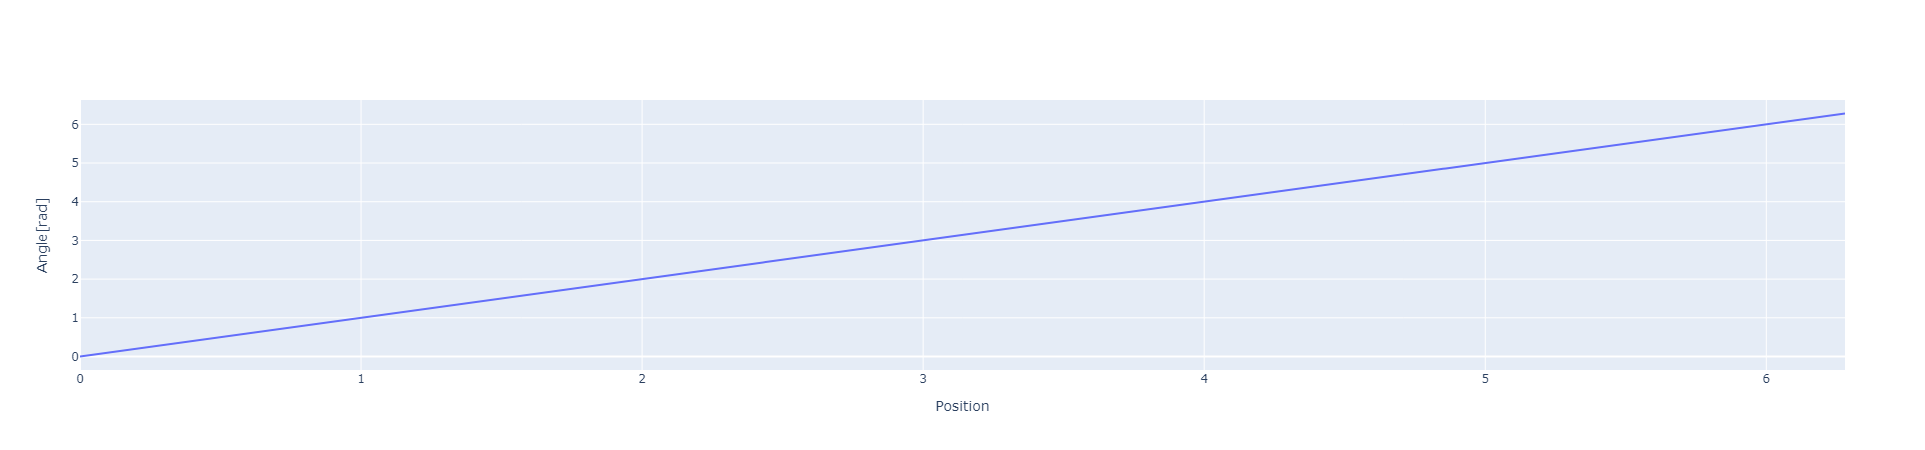

In [85]:
fig = go.Figure()

# 正規化
angle = np.array([2*np.pi + i if i < 0 else i for i in master_atan2 - nonius_atan2])

fig.add_trace(go.Scatter(
    x=t,
    y=angle,
    name="Angle",
))

fig.update_layout(
    xaxis={"title":"Position"},
    yaxis={"title":"Angle[rad]"},
)

fig.show()